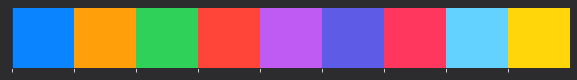

In [12]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from cycler import cycler
import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

raw_dark_palette = [
    (10, 132, 255), # Blue
    (255, 159, 10), # Orange
    (48, 209, 88),  # Green
    (255, 69, 58),  # Red
    (191, 90, 242), # Purple
    (94, 92, 230),  # Indigo
    (255, 55, 95),  # Pink
    (100, 210, 255),# Teal
    (255, 214, 10)  # Yellow
]
raw_darks=[
    (44, 44, 46)
]
raw_lights=[
    (229, 229, 234)
]
miscellaneous={
    'blue':'#0f71d4',
    'green':'#14b827',
    'red':'#cf0c0c'
}

dark_palette=np.array(raw_dark_palette)/255
darks=np.array(raw_darks)/255
lights=np.array(raw_lights)/255

#rcparams
dark_color=darks[-1]
light_color=lights[-1]

mpl.rcParams['axes.prop_cycle']=cycler('color',dark_palette)
mpl.rcParams['figure.facecolor']=dark_color
mpl.rcParams['figure.edgecolor']=dark_color
mpl.rcParams['axes.facecolor']=dark_color
mpl.rcParams['text.color']=light_color
mpl.rcParams['axes.labelcolor']=light_color
mpl.rcParams['axes.edgecolor']=dark_color
mpl.rcParams['xtick.color']=light_color
mpl.rcParams['ytick.color']=light_color
mpl.rcParams['figure.dpi']=80
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

sns.palplot(dark_palette)

In [5]:
X_train_outlier=pd.read_csv('data/X_train_outlier.csv',index_col=[0])
X_val_outlier=pd.read_csv('data/X_val_outlier.csv',index_col=[0])
y_val_outlier=pd.read_csv('data/y_val_outlier.csv',index_col=[0])
y_train_outlier=pd.read_csv('data/y_train_outlier.csv',index_col=[0])

In [8]:
y_train_outlier=y_train_outlier.values.ravel()
y_val_outlier=y_val_outlier.values.ravel()

In [13]:
train=pd.read_csv('data/train.csv',index_col=[0])
X=train.drop(['target'],axis=1)
y=train['target']
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)

In [14]:
y_train=y_train.values.ravel()
y_val=y_val.values.ravel()

In [25]:
test=pd.read_csv('data/test.csv',index_col=[0])
test.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
id,,,,,,,,,,,,,,,,,,,,,
100000,0,0,0,0,0,0,4,4,0,0,...,0,0,0,0,0,0,0,0,0,0
100001,0,0,1,0,0,0,2,0,7,7,...,3,0,1,0,0,0,1,0,2,1
100002,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,6,0
100003,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,6,9,14,3
100004,0,0,0,0,0,0,1,0,4,0,...,1,0,0,0,0,0,0,0,0,0


In [21]:
log_reg=LogisticRegression()
log_reg_l1=LogisticRegression(penalty='l1',C=0.01,solver='liblinear')
k_neighbors=KNeighborsClassifier()
random_forest=RandomForestClassifier()

In [22]:
models={'log reg':log_reg,'log reg l1':log_reg_l1,'random forest':random_forest}

In [19]:
for name,model in models.items():
    model.fit(X_train_outlier,y_train_outlier)
    print(f'{name} - {model.score(X_val_outlier,y_val_outlier)}')

F:\anacondapython\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
log reg - 0.56835
log reg l1 - 0.57425
random forest - 0.57565


As seen from the above results the accuracy isn't all that great the best one yet is random forest. Maybe using the entire dataset with outliers would help.

In [23]:
for name,model in models.items():
    model.fit(X_train,y_train)
    print(f'{name} - {model.score(X_val,y_val)}')

F:\anacondapython\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
log reg - 0.5746
log reg l1 - 0.5746
random forest - 0.57515


Even using the entire dataset the results weren't that different and random forest is still the best one though the logistic regression ones are performing better. The k neighbgors classifier isn't performing that well so removing it. Increasing the regularizer strength wasn't that better either.

In [24]:
random_forest.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
sub_model_1=random_forest.predict_proba(test)

In [29]:
class_1=list()
class_2=list()
class_3=list()
class_4=list()
for proba in sub_model_1:
    class_1.append(proba[0])
    class_2.append(proba[1])
    class_3.append(proba[2])
    class_4.append(proba[3])

In [33]:
sample_submission=pd.read_csv('data/sample_submission.csv')
sample_submission.head()

,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.25,0.25,0.25,0.25
1,100001,0.25,0.25,0.25,0.25
2,100002,0.25,0.25,0.25,0.25
3,100003,0.25,0.25,0.25,0.25
4,100004,0.25,0.25,0.25,0.25


In [36]:
sample_submission.drop(['Class_1','Class_2','Class_3','Class_4'],inplace=True,axis=1)

,id
0,100000
1,100001
2,100002
3,100003
4,100004


In [37]:
sample_submission['Class_1']=class_1
sample_submission['Class_2']=class_2
sample_submission['Class_3']=class_3
sample_submission['Class_4']=class_4

In [40]:
sample_submission.to_csv('submissions/sample_submission_1.csv')